In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphs import *                      # module I wrote for graphs
from tqdm import tqdm                     # progress bar library
from scipy.io import loadmat              # importing mat files
from scipy.special import zeta            # Riemann zeta
from scipy.optimize import newton_krylov  # nonlinear equation solver

## Part 2

In [29]:
N = int(1e8)
ks = np.linspace(1, N, N)

In [30]:
z1 = (ks**(-1.2)).sum()/zeta(2.2)  # first moment
z1

3.6671113675274922

2a

In [31]:
def F(u):
    return u - (ks**(-1.2)*u**(ks-1)).sum()/(z1*zeta(2.2))

x = newton_krylov(F, 0, f_tol=1e-5)  # u in 2a
x

array(0.20129742)

In [32]:
S = 1 - (ks**(-2.2)*x**ks).sum()/zeta(2.2)  # fraction of nodes in giant component
S

0.8584860754149224

2b

In [33]:
T = 0.4
def F(u):
    return u - (ks**(-1.2)*(1 - T + T*u)**(ks-1)).sum()/(z1*zeta(2.2))

x = newton_krylov(F, 0, f_tol=1e-5)
x

array(0.29594047)

In [34]:
S = 1 - (ks**(-2.2)*(1 - T + T*x)**ks).sum()/zeta(2.2)  # outbreak size for T = 0.4
S

0.40447170880141414

2c

In [35]:
T = 0.4
def F(vec):
    u = vec[0]; v = vec[1]
    out = np.zeros((2,))
    out[0] = 1 - (ks**(-2.2)*(1 - (1-v)*T + (1-v)*T*u)**ks).sum()/zeta(2.2)
    out[1] = u - (ks**(-1.2)*(1 - (1-v)*T + (1-v)*T*u)**(ks-1)).sum()/(z1*zeta(2.2))
    return out

x = newton_krylov(lambda x : F([x, 1])[1], 0, f_tol=1e-5)
x  # u for v = 1 -- the fact that this exists is enough to confirm that v = 1 is a soln

array(1.)

## Part 3

In [2]:
# import all the graphs
raw = loadmat('powerlawgraphs.mat')
graphs = raw['graphs'][0]

In [25]:
# average fraction of vertices in giant component
n = 10**4
empS = 0
for graph in tqdm(graphs):
    G = Graph()._from_matlab(graph.todense(), graph.shape[0])
    forest = G.DFS()

    # Compute desired quantities
    giantsz = max(forest.values())  # sz of giant component
    empS += giantsz/(n*graphs.shape[0])  # fraction of vertices in giant component

100%|██████████| 100/100 [2:23:18<00:00, 85.99s/it]


In [27]:
empS  # fraction of nodes in giant component, averaged over 100 such graphs

0.821523

In [3]:
# T_c
Ts = np.linspace(0, 0.5)
G = Graph()._from_matlab(graphs[0].todense(), graphs[0].shape[0])
infected_sweep = {}
for i in tqdm(range(Ts.shape[0])):
    infected_sweep[i] = G.disc_time_SIR(1000, Ts[i])  # node 1000 is in giant component

100%|██████████| 50/50 [12:44<00:00, 15.29s/it]


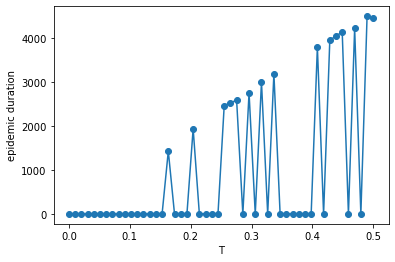

In [22]:
# Plot epidemic durations against T to find T_c
epilengths = [len(epidemic) for epidemic in infected_sweep.values()]
plt.plot(Ts, epilengths, marker='o')
plt.xlabel('T')
plt.ylabel('epidemic duration')
plt.savefig('../pics/tc_epilengths.png')
plt.show()

In [12]:
Ts[15]  # value of T_c

0.1530612244897959

In [13]:
# v_c for T = 0.4
T = 0.4
vs = np.linspace(0, 1)
vaccine_sweep = {}
for i in tqdm(range(vs.shape[0])):
    vaccine_sweep[i] = G.disc_time_SIR(1000, (1 - vs[i])*T)

100%|██████████| 50/50 [06:42<00:00,  8.04s/it]


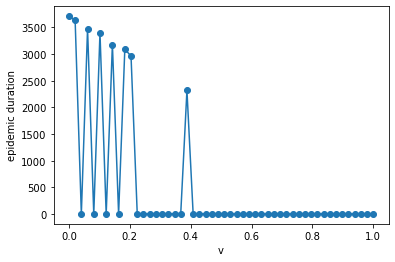

In [24]:
# Plot epidemic durations against T to find v_c
vepilengths = [len(epidemic) for epidemic in vaccine_sweep.values()]
plt.plot(vs, vepilengths, marker='o')
plt.xlabel('v')
plt.ylabel('epidemic duration')
plt.savefig('../pics/vc_epilengths.png')
plt.show()


In [20]:
vs[20]  # value of v_c

0.4081632653061224

## Part 4

In [2]:
# Load random graph from MATLAB
raw = loadmat('powerlaw.mat')
G = Graph()._from_matlab(raw['G'], raw['G'].shape[0])

In [22]:
# Run 100 discrete-time SIR model and record infected individuals over time
r = 100
infected = {}
for itr in tqdm(range(r)):
    s = np.random.randint(low=0, high=10**4)
    infected[itr] = G.disc_time_SIR(s, 0.4)

100%|██████████| 100/100 [2:26:46<00:00, 88.06s/it]


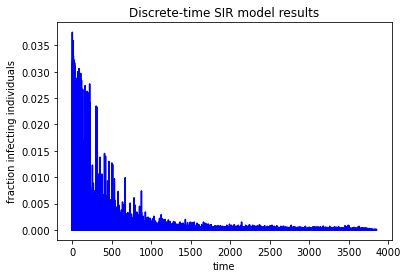

In [25]:
# Plot all the fractions on the same axes
for itr in infected.keys(): plt.plot(infected[itr], 'b')
plt.xlabel('time')
plt.ylabel('fraction infecting individuals')
plt.title('Discrete-time SIR model results')
plt.savefig('../pics/discSIR.png')
plt.show()